# Lending Club Loan Default Analysis by Manish Tyagi 

**The analysis is divided into four main parts:**

**1.Initial Data understanding
**2.Data cleaning (cleaning missing values, removing redundant columns etc.)
**3.Data Analysis
**4.Recommendations

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#set printing options
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#load input file
loan_ip=pd.read_csv('loan.csv')
loan_ip.shape

/var/folders/j6/145g_05j1z514zqkz1rjjpwh0000gn/T/ipykernel_63173/786920184.py:10: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_ip=pd.read_csv('loan.csv')


(39717, 111)

# 1. Initial Data Understanding

In [106]:
#analysing initial first few rows to see how data looks like
loan_ip.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,dti,mths_since_last_delinq,pub_rec_bankruptcies,month,year
0,5000,5000,low,36,medium,162.87,B,B2,NaN,expert,RENT,low,Verified,2011-12-01,0,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,high,NaN,0.0,12,2011
1,2500,2500,low,60,high,59.83,C,C4,Ryder,fresher,RENT,low,Source Verified,2011-12-01,1,Borrower added on 12/22/11 > I plan to use t...,car,bike,low,NaN,0.0,12,2011
2,2400,2400,low,36,high,84.33,C,C5,NaN,expert,RENT,low,Not Verified,2011-12-01,0,NaN,small_business,real estate business,low,NaN,0.0,12,2011
3,10000,10000,medium,36,medium,339.31,C,C1,AIR RESOURCES BOARD,expert,RENT,low,Source Verified,2011-12-01,0,Borrower added on 12/21/11 > to pay for prop...,other,personel,medium,35.0,0.0,12,2011
5,5000,5000,medium,36,low,156.46,A,A4,Veolia Transportaton,junior,RENT,low,Source Verified,2011-12-01,0,NaN,wedding,My wedding loan I promise to pay back,medium,NaN,0.0,12,2011


In [4]:
#checking column details 
loan_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#checking column details 
loan_ip.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# 2.Data Cleaning

In [6]:
#check null values % in each column
round(loan_ip.isnull().sum()/len(loan_ip.index), 2)*100


id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [7]:
#drop null value columns
loan_ip=loan_ip.dropna(axis=1,how='all')

In [54]:
#check null values % in each column after dropping columns 
round(loan_ip.isnull().sum()/len(loan_ip.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [7]:
#check column details after dropping columns with all null values 
loan_ip.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [8]:
#check column details after dropping columns with all null values 
loan_ip.shape

(39717, 57)

Now the dataframe has 57 columns 

In [9]:
#Columns mths_since_last_record and next_pymnt_d have more than 90% null values. hence dropping the two columns from the dataframe

loan_ip = loan_ip.drop(['mths_since_last_record','next_pymnt_d'], axis=1)

In [25]:
#check null values % in each column after dropping columns 
round(loan_ip.isnull().sum()/len(loan_ip.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [10]:
#check column details after dropping columns with null values % above 90 
loan_ip.shape

(39717, 55)

Now the cleaned dataframe has 55 columns

In [11]:
#remove columns with high distinct values 
unique_counts = loan_ip.nunique()

print(unique_counts)


id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [12]:
#dropping all the columns that have just 1 distinct values

loan_ip = loan_ip.drop(['out_prncp','out_prncp_inv','pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)
loan_ip.shape   #44 columns left


(39717, 44)

In [13]:
#drop columns related to customer details which have no correlation to loan default

loan_ip=loan_ip.drop(['id', 'member_id','url','zip_code','addr_state'], axis=1)



In [14]:
#check column details 
loan_ip.shape 

(39717, 39)

Now the cleaned dataframe is left with 39 columns 

In [15]:
#drop customer behaviour columns which are not required for analysis

loan_ip=loan_ip.drop(['delinq_2yrs', 'earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis=1)


In [16]:
#check column details 
loan_ip.shape 

(39717, 21)

**Now the cleaned dataframe is left with 21 columns which are relevant for our analysis 

# 3. Data Analysis 

**This step involves detailed analysis of data and would also involve further cleaning of data based on the insights from the data analysis 


**UNIVARIATE ANALYSIS / SEGMENTED UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='loan_status', ylabel='count'>

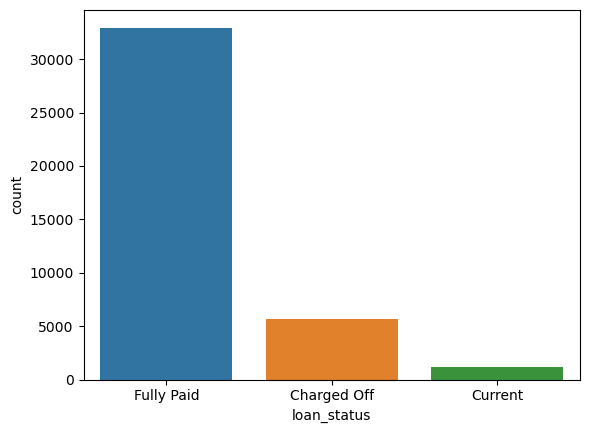

In [17]:
#analysing Loan_status 

sns.countplot(x = 'loan_status', data = loan_ip)

In [18]:
#as status 'current' is of no importance for our analysis, rows with this status should be filtered out 

loan_ip=loan_ip[loan_ip['loan_status']!="Current"]

In [19]:
#check no of rows in the cleaned dataframe
loan_ip.shape

(38577, 21)

In [20]:
#checking for missing values in columns 

round(loan_ip.isnull().sum()/len(loan_ip.index), 2)*100

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  6.0
emp_length                 3.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
desc                      32.0
purpose                    0.0
title                      0.0
dti                        0.0
mths_since_last_delinq    65.0
pub_rec_bankruptcies       2.0
dtype: float64

**Variable "emp_length" is of importance for the analysis. First it will be converted to numeric value and missing rows will be imputed with the mode of the variable

In [21]:
#convert 'emp_length' to numeric 

loan_ip["emp_length"] = loan_ip["emp_length"].str.extract("(\d*\.?\d+)", expand=True)

In [22]:
loan_ip["emp_length"].head() 

0    10
1     1
2    10
3    10
5     3
Name: emp_length, dtype: object

In [23]:
#calculating mode of the column
loan_ip["emp_length"].mode() 

0    10
Name: emp_length, dtype: object

In [24]:
#replacing missing values in the column emp_length with mode value

loan_ip['emp_length'] = loan_ip['emp_length'].fillna("10")

**Column 'int_rate' will also be important for the analysis. The "%" will be dropped from the values and converted to numeric

In [25]:
#removing % and converting it to numeric

loan_ip["int_rate"]=loan_ip["int_rate"].str.replace("%","")

loan_ip["int_rate"]= pd.to_numeric(loan_ip["int_rate"])

In [26]:
#check the values of int_rate

loan_ip["int_rate"].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

**Column 'Loan Status' has text values. For our analysis , we will convert them into numeric by assigning values 1 for 'Charged Off' and 0 for 'Fully Paid'

In [27]:
#assigning 1 and 0 
loan_ip['loan_status'] = loan_ip['loan_status'].replace(['Charged Off'],1)
loan_ip['loan_status'] = loan_ip['loan_status'].replace(['Fully Paid'],0)

loan_ip["loan_status"]= pd.to_numeric(loan_ip["loan_status"])

In [28]:
#check the unique values of column 'loan_status'

loan_ip['loan_status'].unique()


array([0, 1])

**Now we will analyse some important columns to see if any outlier handling is needed? 


/Users/priyankagharpure/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

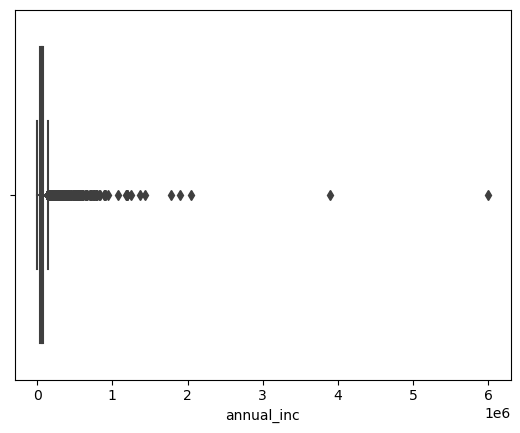

In [29]:
#outlier handling - annual_inc


#analyse values in the column annual_inc
sns.boxplot(loan_ip['annual_inc'])


In [30]:
loan_ip['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [31]:
quantile_info = loan_ip.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info


0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

**As values above 95 percentile have outliers, we will rows with values below 95 percentile for our analysis 

In [32]:
#filtering out values above 95 percentile 

loan_ip = loan_ip[loan_ip["annual_inc"] < loan_ip["annual_inc"].quantile(0.95)]

/Users/priyankagharpure/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

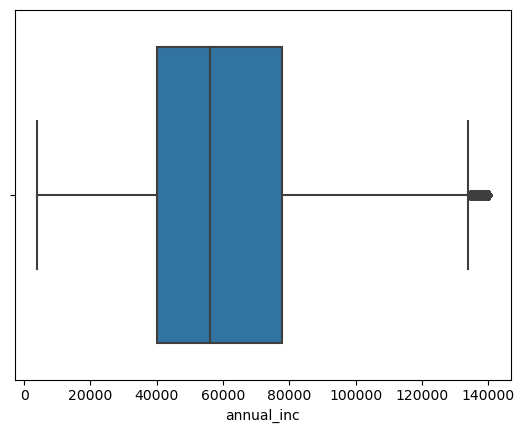

In [83]:
#analysing the values again to see if outliers have been handled 

sns.boxplot(loan_ip['annual_inc'])

**Now data distribution looks good. 

**Analysing other important to see if any outlier handling is needed?

**Analysing other important to see if any outlier handling is needed

In [33]:
loan_ip.shape

(36642, 21)

/Users/priyankagharpure/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funded_amnt_inv'>

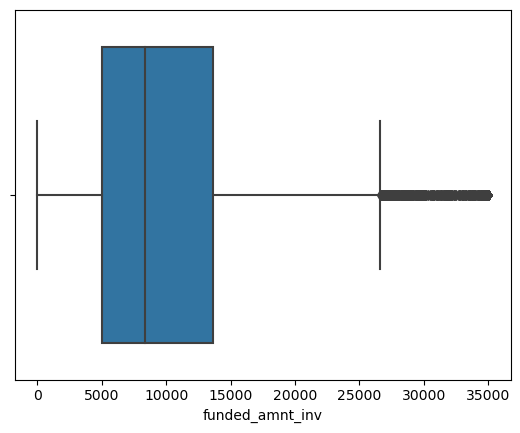

In [35]:
#analysis of funded_amnt_inv

sns.boxplot(loan_ip.funded_amnt_inv)

/Users/priyankagharpure/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

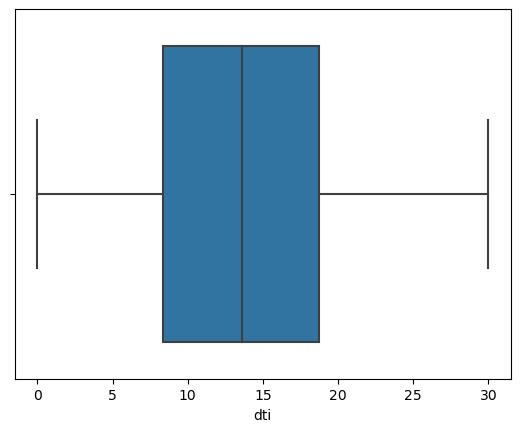

In [36]:
#analysis of dti
sns.boxplot(loan_ip.dti)

**Data distribution in both DTI and funded_amnt_inv looks good and doesnt require any correction

**Data in column 'Term' has text 'months'. This should be removed for further analysis. 

In [34]:
loan_ip['term'] = loan_ip['term'].str[0:3]

In [35]:
loan_ip["term"]= pd.to_numeric(loan_ip["term"])

In [36]:
#verify values in column 'Term' after correction
loan_ip["term"].unique()

array([36, 60])

In [37]:
#check the final cleaned data set
loan_ip.shape

(36642, 21)

**After cleaning of data , the dataframe has 21 columns and 36642 rows which will be further used for analysis.


**UNIVARIATE ANALYSIS


<AxesSubplot:xlabel='loan_status', ylabel='count'>

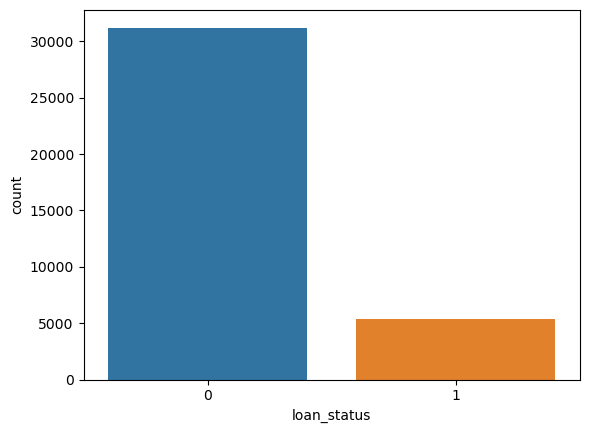

In [38]:
#check overall loan status 
sns.countplot(x = 'loan_status', data = loan_ip)

In [39]:
#checking unique values for home_ownership
loan_ip['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

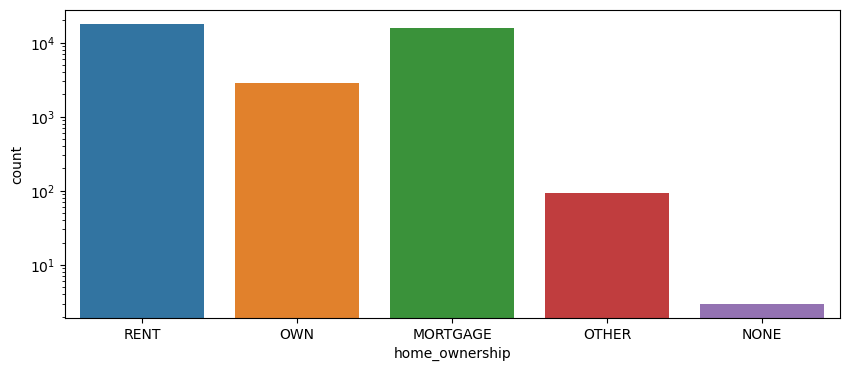

In [40]:
#checking count of each distinct value in home_ownership

fig, ax = plt.subplots(figsize = (10,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership',data=loan_ip)

**'NONE' has very negligible no. of records. For analysis purposes, it can be replaced with OTHER

In [41]:
#replacing 'NONE' with 'OTHERS'
loan_ip['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

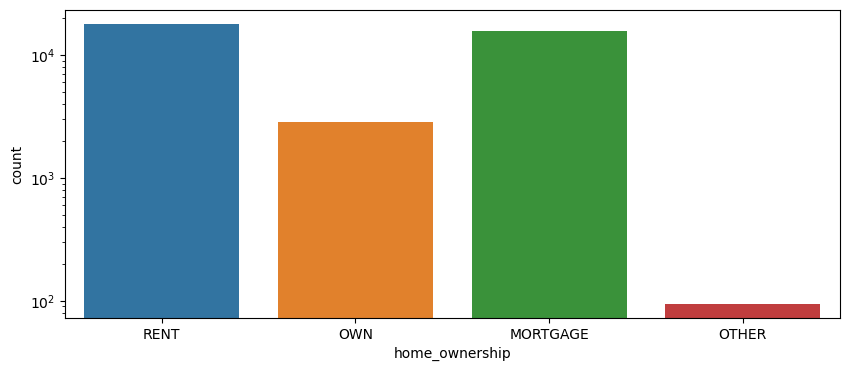

In [54]:
#checking count of each distinct value in home_ownership after cleaning

fig, ax = plt.subplots(figsize = (10,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership',data=loan_ip)

**As we have to do analysis of default % across various variables, we will create a function that can be called for further analysis

In [42]:
# defining a function to plot loan_status (default rate or % of 'Charged Off') across various categorical variables for analysis
def plot_status(var):
    sns.barplot(x=var, y='loan_status', data=loan_ip)
    plt.show()

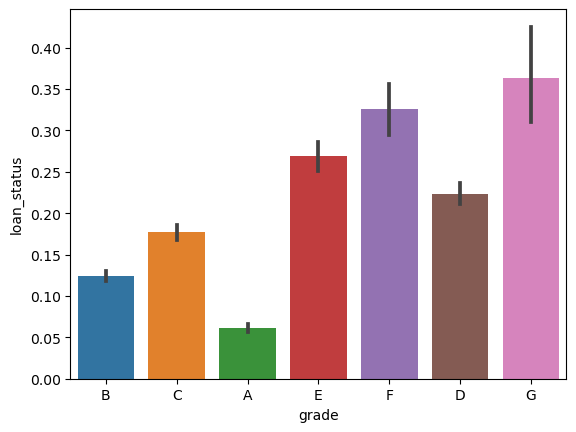

In [43]:
#Default % VS grade analysis

plot_status("grade")

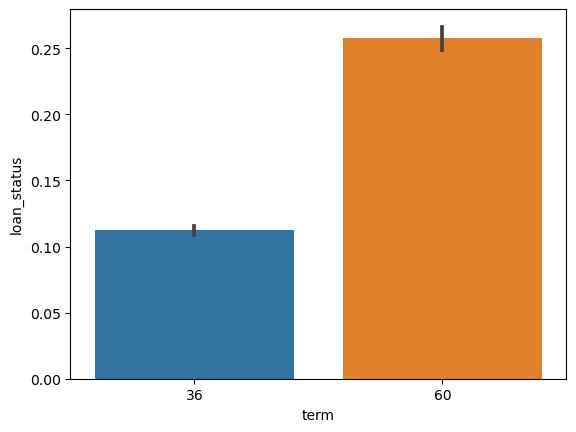

In [44]:
#Default % vs term analysis 

plot_status('term')


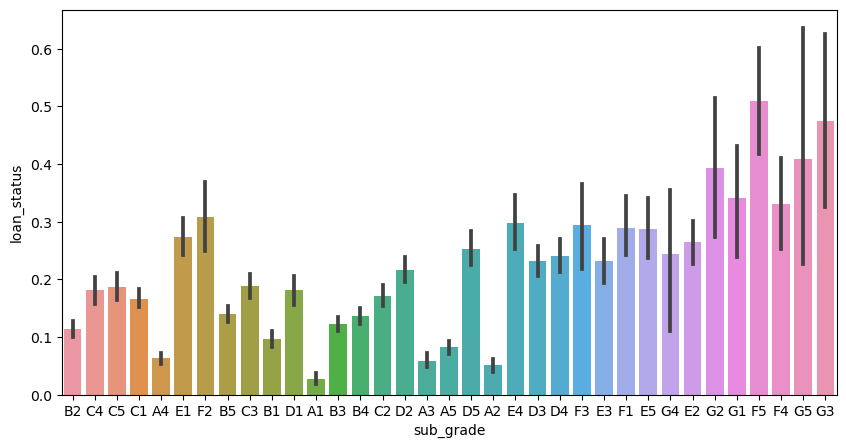

In [45]:
#Default % vs sub-grade: not a deciding factor as all the values are quite close 
plt.figure(figsize=(10, 5))
plot_status('sub_grade')


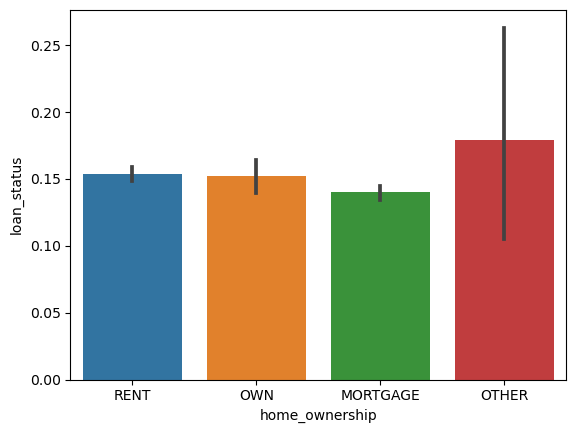

In [47]:
# home ownership: all values close , not a great discriminator
plot_status('home_ownership')

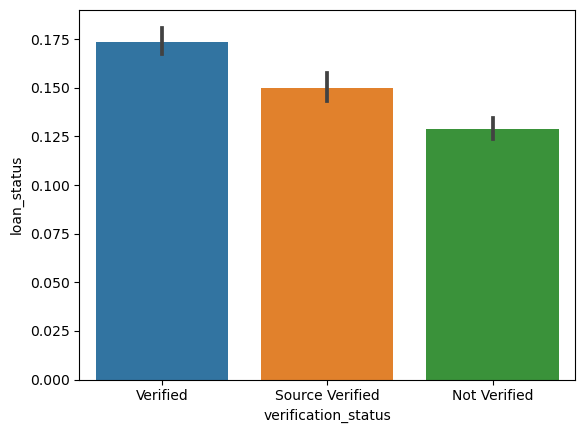

In [46]:
# verification_status: surprisingly, verified loans default more than not verified
plot_status('verification_status')

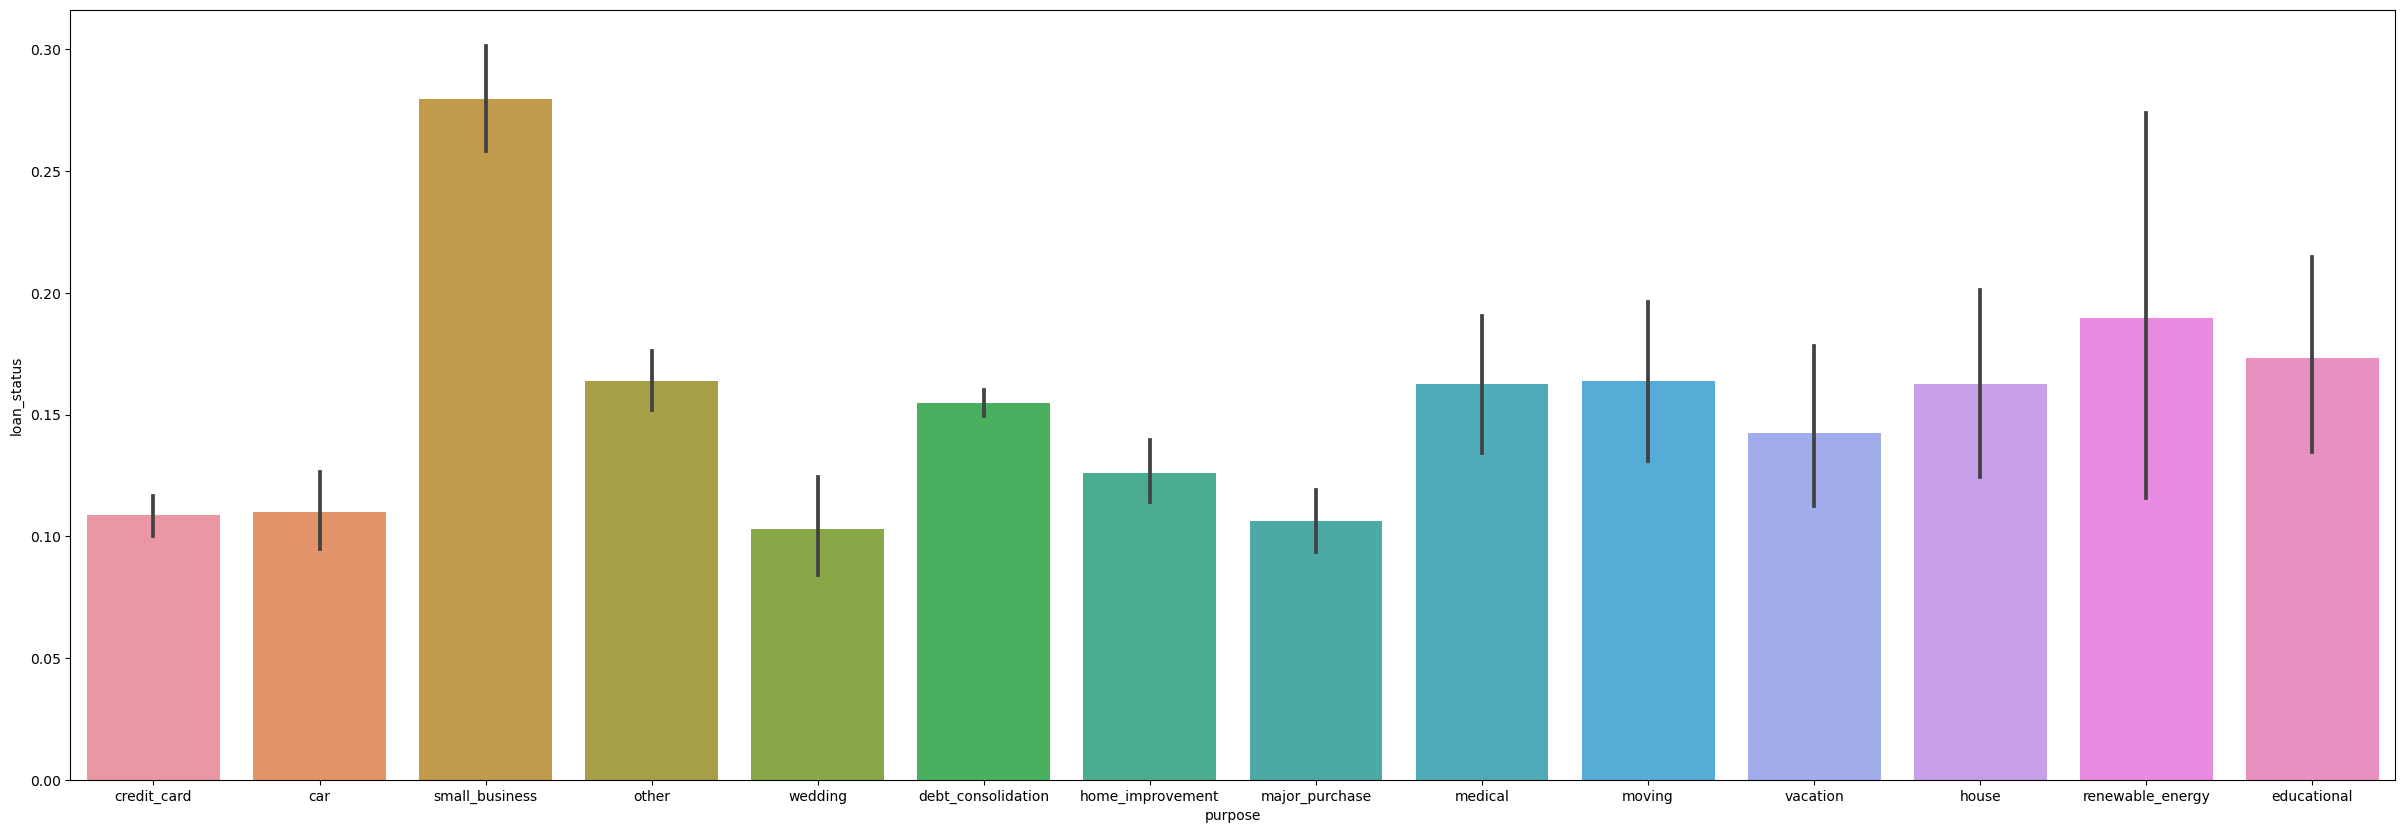

In [47]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(30, 10))
plot_status('purpose')


In [48]:
# checking the distribution of loans across years
# convert the year column into datetime and then extract year and month from it
loan_ip['issue_d'].head()


0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [49]:
from datetime import datetime
loan_ip['issue_d'] = loan_ip['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

loan_ip['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [50]:
# extracting month and year from issue_date
loan_ip['month'] = loan_ip['issue_d'].apply(lambda x: x.month)
loan_ip['year'] = loan_ip['issue_d'].apply(lambda x: x.year)

In [51]:
# check number of loans granted across years
loan_ip.groupby('year').year.count()

year
2007      230
2008     1489
2009     4475
2010    11007
2011    19441
Name: year, dtype: int64

In [52]:
# number of loans across months
loan_ip.groupby('month').month.count()


month
1     2267
2     2251
3     2551
4     2712
5     2788
6     3008
7     3193
8     3214
9     3287
10    3532
11    3820
12    4019
Name: month, dtype: int64

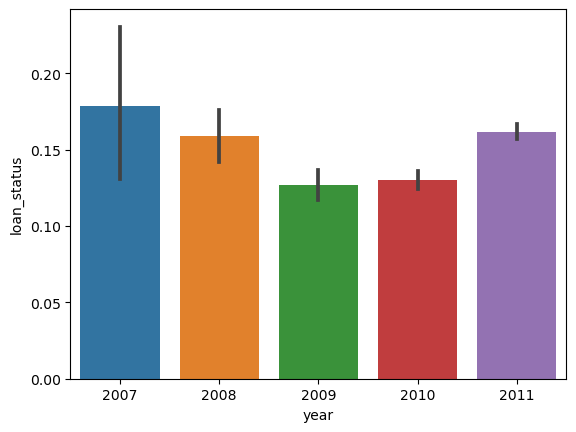

In [53]:
# default rates across years
# the default rate was highest in 2007 and increased in 2011, inspite of reducing from 2008 till 2010
plot_status('year')


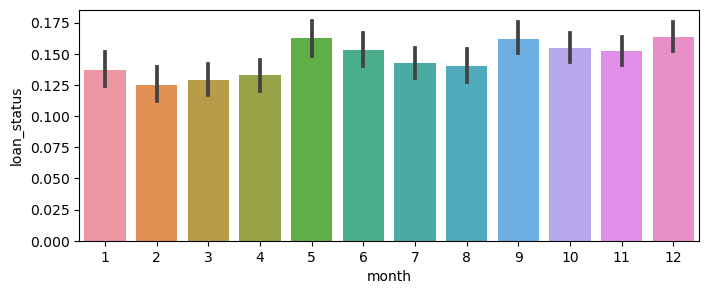

In [54]:
# default rates across months: not much variation across months
plt.figure(figsize=(8, 3))
plot_status('month')


**There are some continous variables which are of importance for our univariate and bivariate analysis. We will convert them into categorical values using binning.

In [55]:
#binning funded_amnt_inv

loan_ip["funded_amnt_inv"].describe()

def funded_amnt_inv(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'

In [56]:
loan_ip['funded_amnt_inv'] = loan_ip['funded_amnt_inv'].apply(lambda x: funded_amnt_inv(x))

In [57]:
loan_ip['funded_amnt_inv'].value_counts()

medium       20269
low           9225
high          6088
very high     1060
Name: funded_amnt_inv, dtype: int64

In [58]:
loan_ip['funded_amnt_inv'].head()

0       low
1       low
2       low
3    medium
5    medium
Name: funded_amnt_inv, dtype: object

In [59]:
# binning interest rate to low, medium, high  


loan_ip["int_rate"].describe()


def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    

In [60]:
loan_ip['int_rate'] = loan_ip['int_rate'].apply(lambda x: int_rate(x))

In [61]:
loan_ip["int_rate"].head()

0    medium
1      high
2      high
3    medium
5       low
Name: int_rate, dtype: object

In [62]:
# binning debt to income ratio


loan_ip["dti"].describe()

def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'

In [63]:
loan_ip['dti'] = loan_ip['dti'].apply(lambda x: dti(x))

In [64]:
loan_ip["dti"].head()


0      high
1       low
2       low
3    medium
5    medium
Name: dti, dtype: object

In [65]:
# binning annual income


loan_ip["annual_inc"].describe()

def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

In [66]:
loan_ip['annual_inc'] = loan_ip['annual_inc'].apply(lambda x: annual_income(x))

In [67]:
loan_ip["annual_inc"].head()

0    low
1    low
2    low
3    low
5    low
Name: annual_inc, dtype: object

In [68]:
# binning employment length


loan_ip["emp_length"].describe()

loan_ip["emp_length"].unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7'], dtype=object)

In [69]:
#converting variable to numeric 

loan_ip["emp_length"]= pd.to_numeric(loan_ip["emp_length"])

In [70]:
# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

In [71]:
loan_ip['emp_length'] = loan_ip['emp_length'].apply(lambda x: emp_length(x))

In [72]:
loan_ip["emp_length"].unique()

array(['expert', 'fresher', 'junior', 'senior'], dtype=object)

**Analysis by binned columns

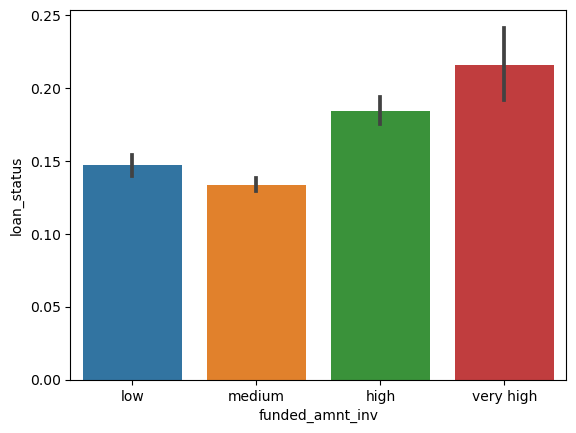

In [73]:
#Default% analysis by funded_amnt_inv
plot_status('funded_amnt_inv')

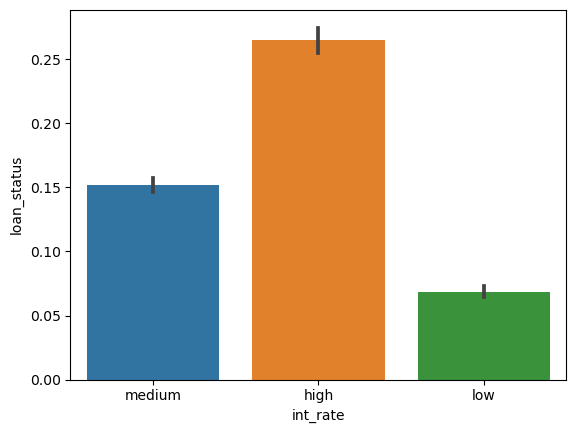

In [74]:
#Default% analysis by int_rate     
plot_status('int_rate')

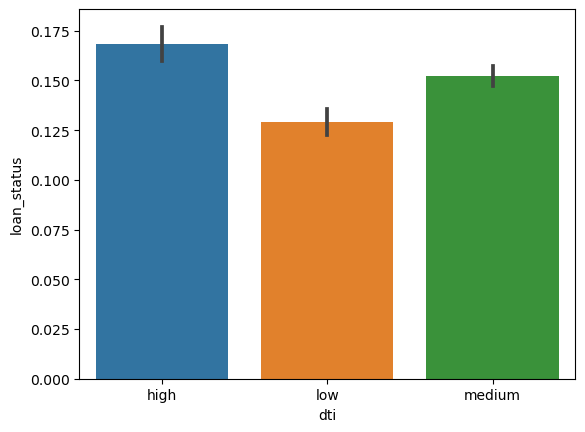

In [75]:
#analysis by dti    
plot_status('dti')

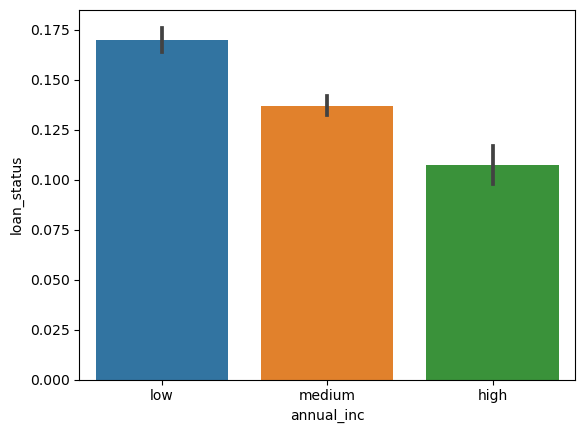

In [76]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_status('annual_inc')


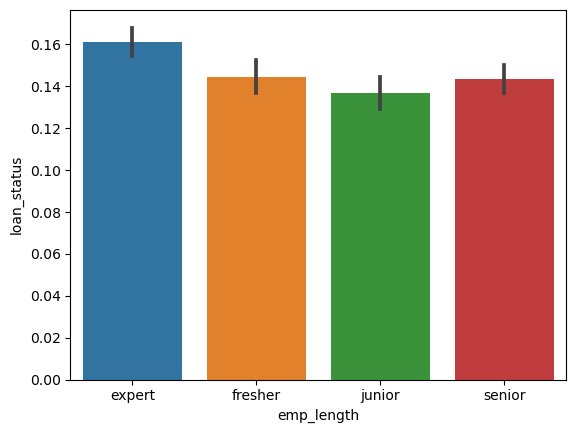

In [77]:
# emp_length and default rate
# not much of a predictor of default
plot_status('emp_length')

# 3. BIVARIATE ANALYSIS

In [78]:
#  a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(20, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan_ip)
    plt.show()

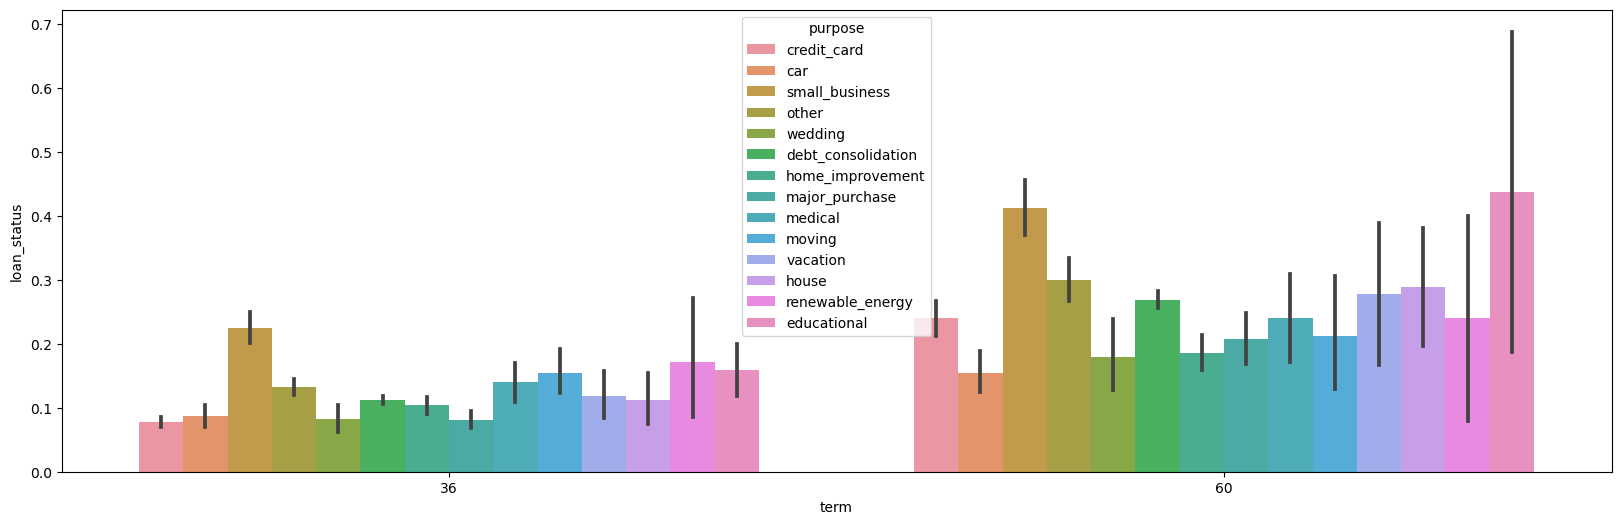

In [79]:
#term analysis

plot_segmented('term')

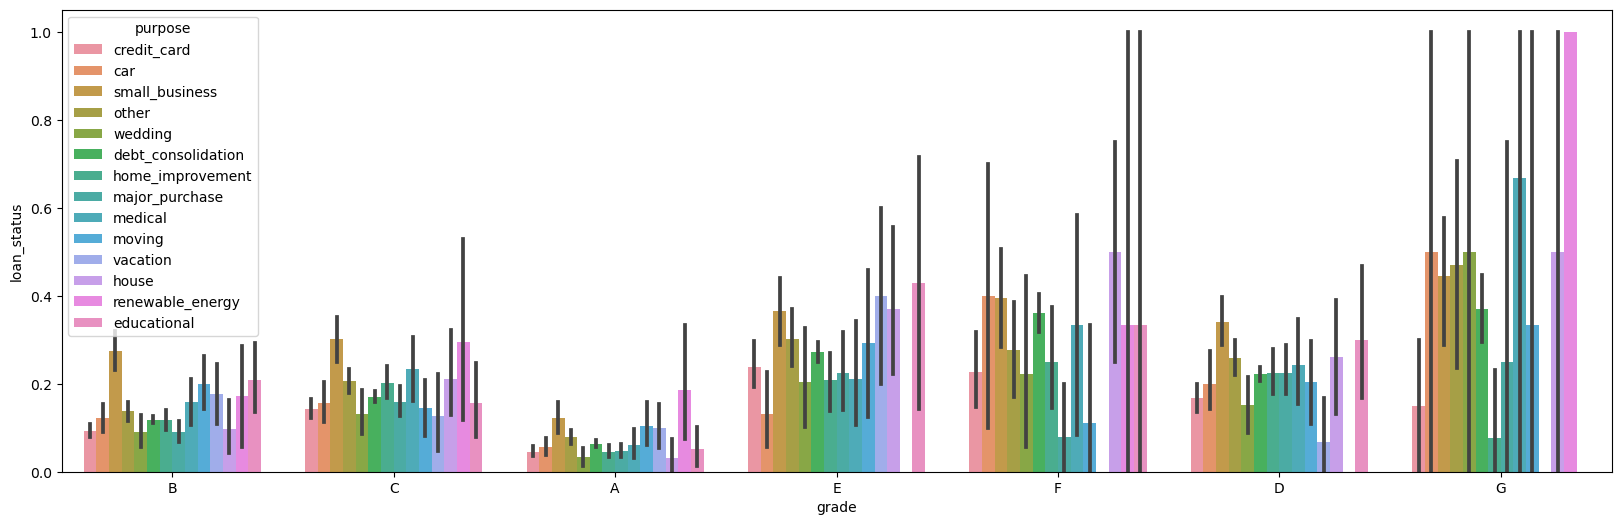

In [80]:
# grade of loan
plot_segmented('grade')


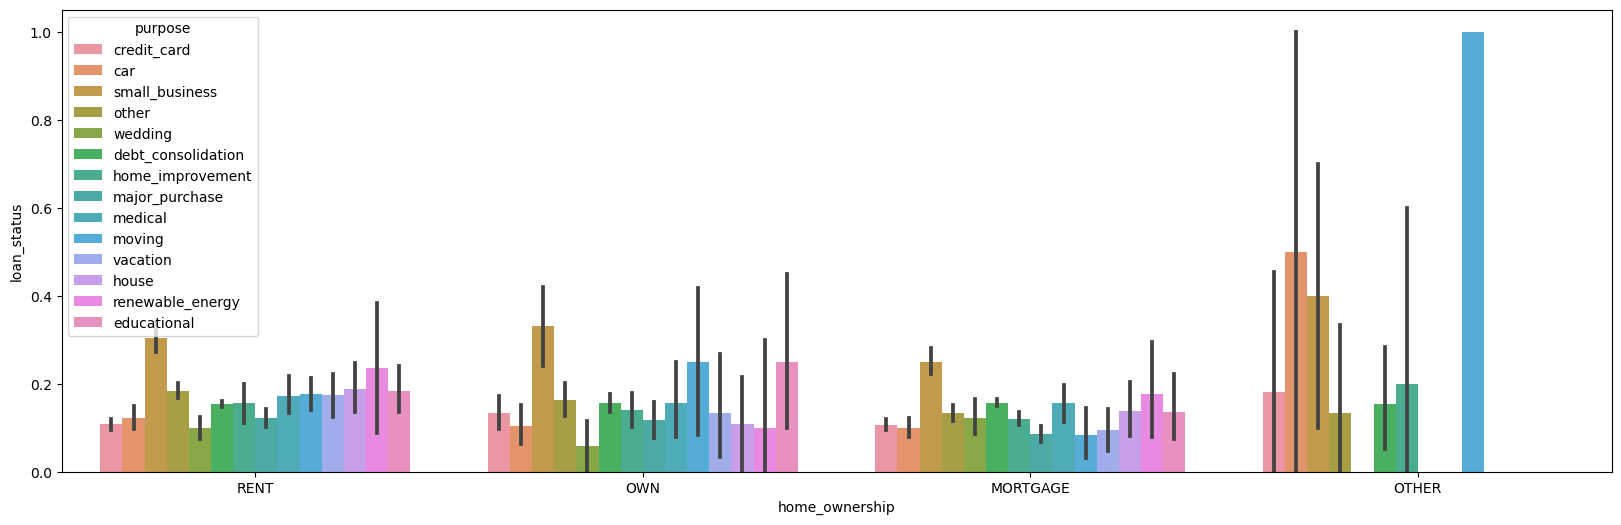

In [81]:
# home ownership
plot_segmented('home_ownership')


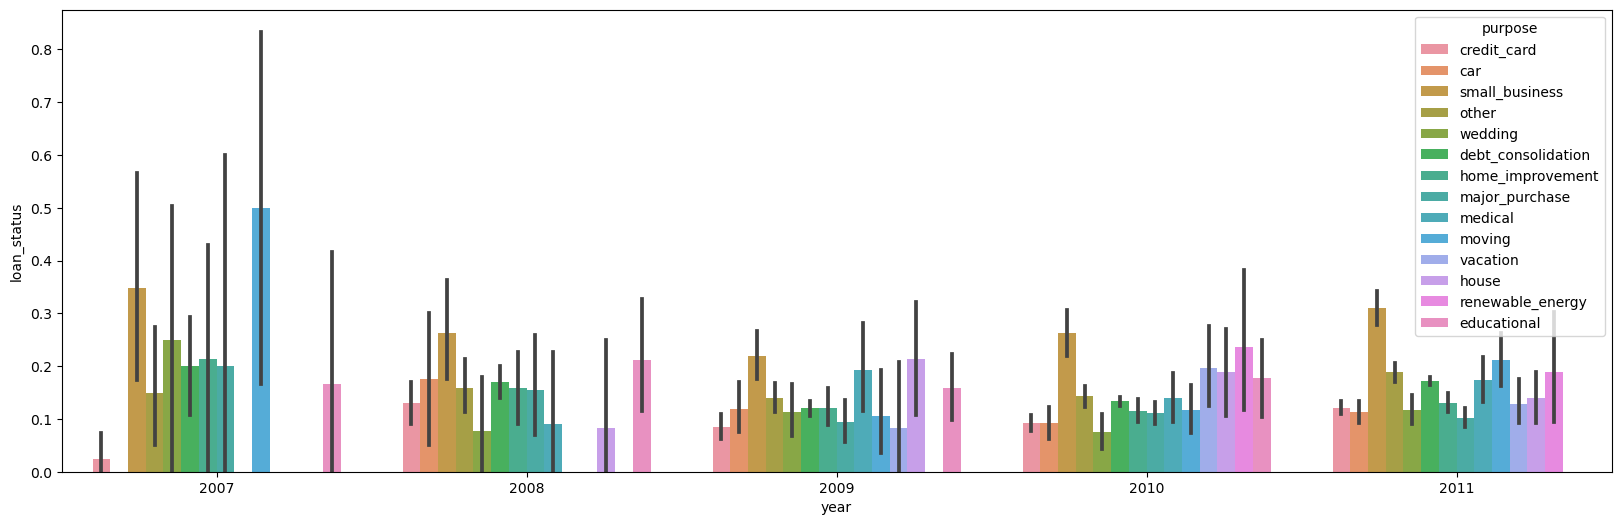

In [82]:
# year
plot_segmented('year')


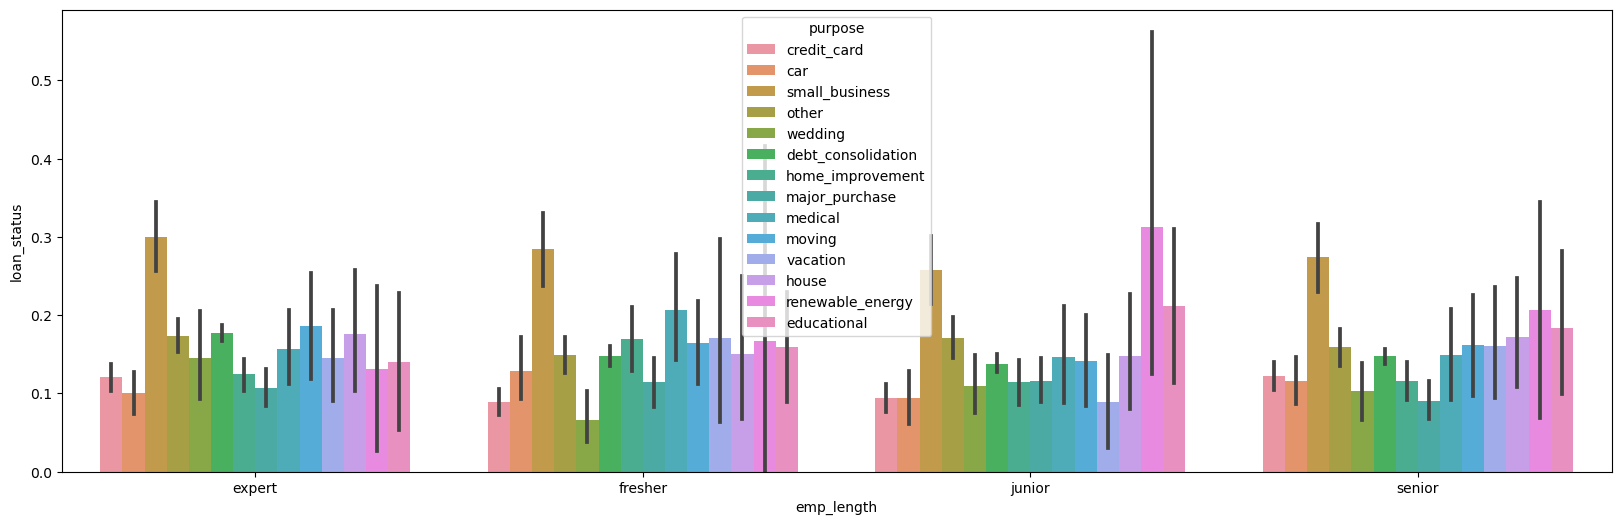

In [83]:
# emp_length
plot_segmented('emp_length')

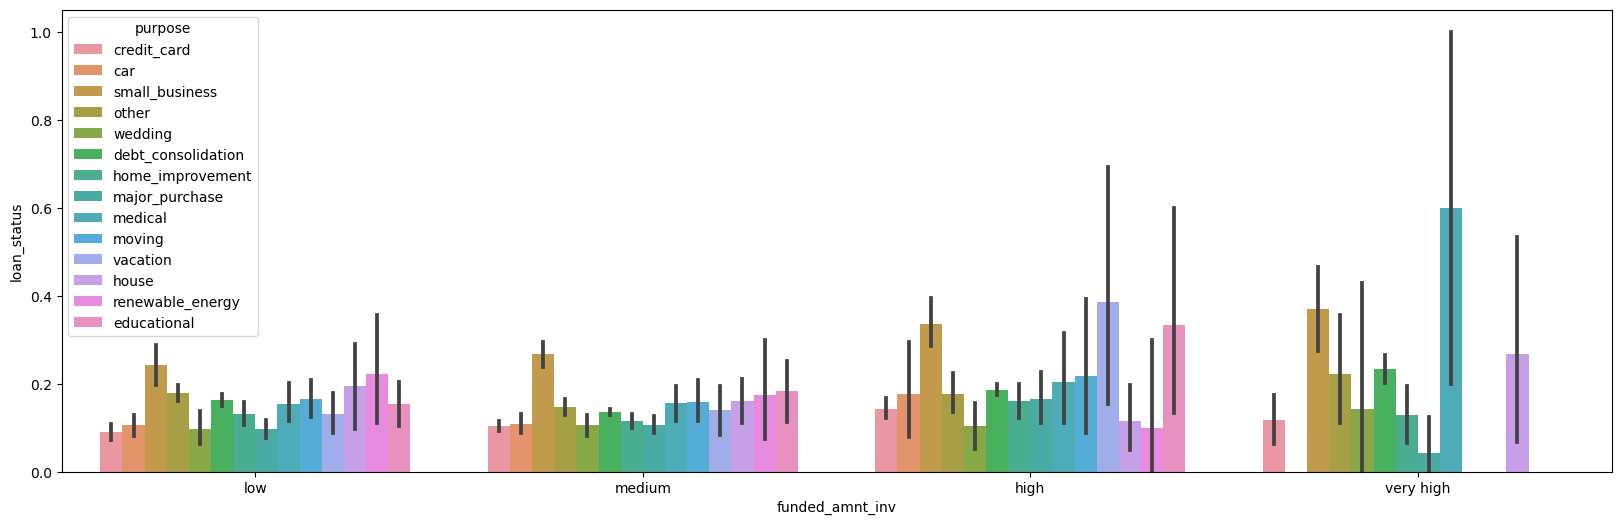

In [84]:
# loan_amnt: same trend across loan purposes
plot_segmented('funded_amnt_inv')

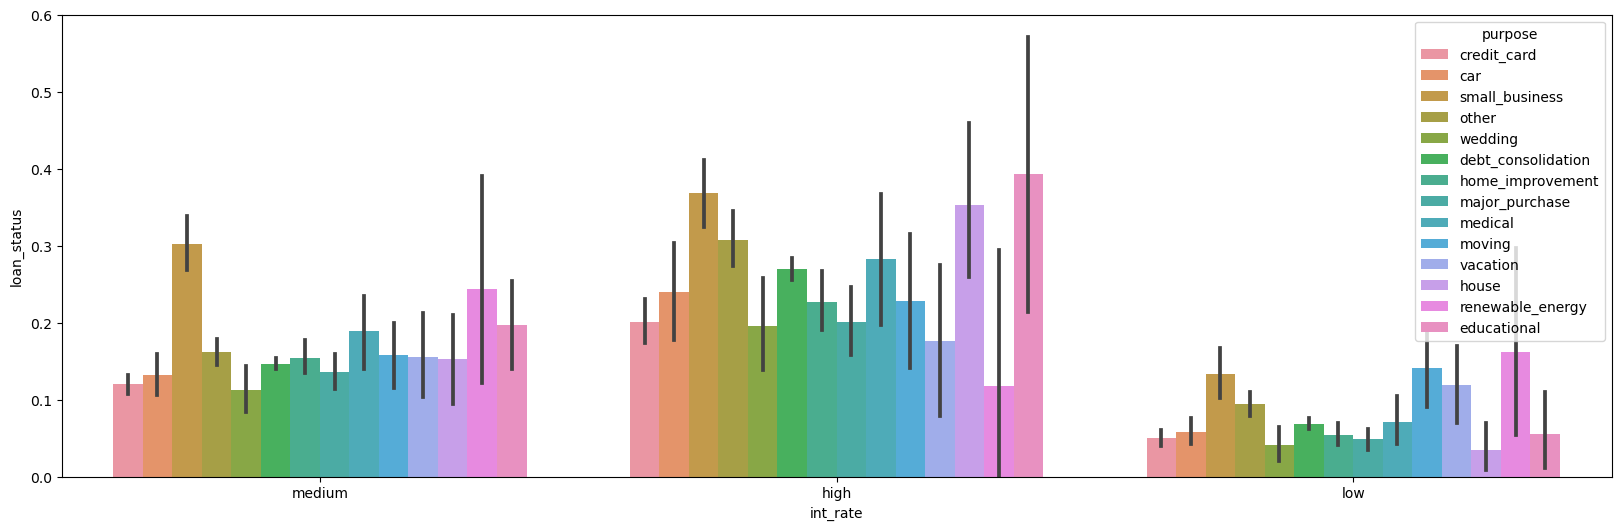

In [85]:
# interest rate
plot_segmented('int_rate')

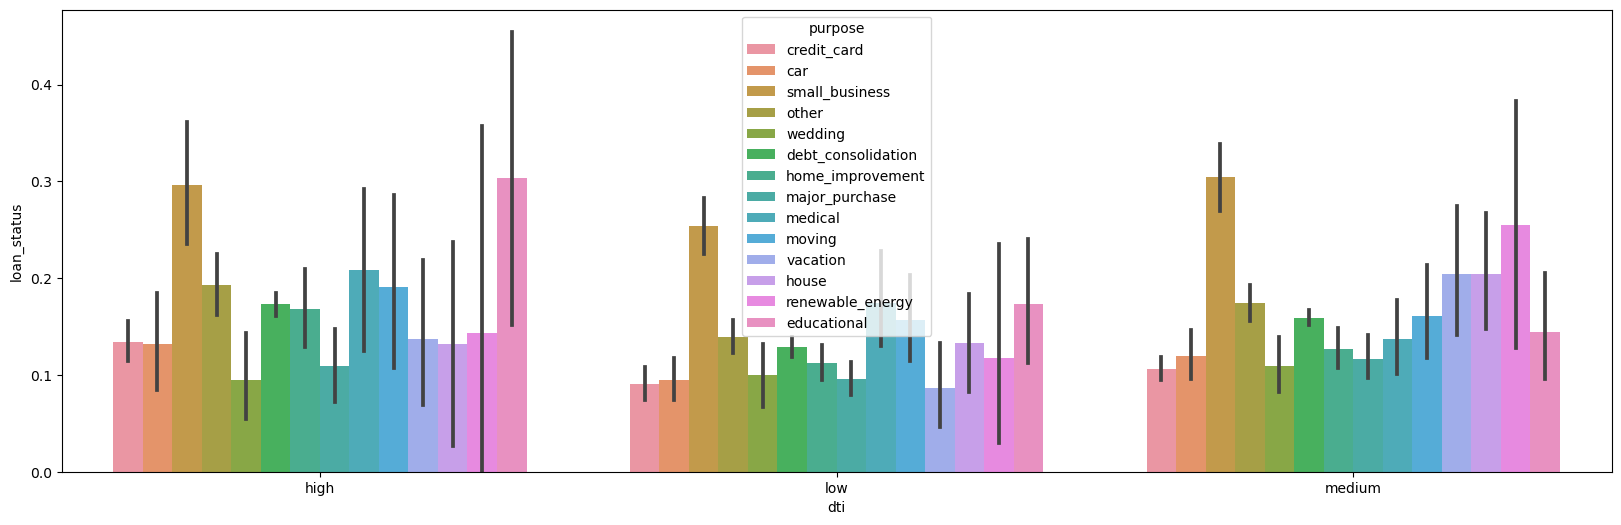

In [86]:
# debt to income ratio
plot_segmented('dti')


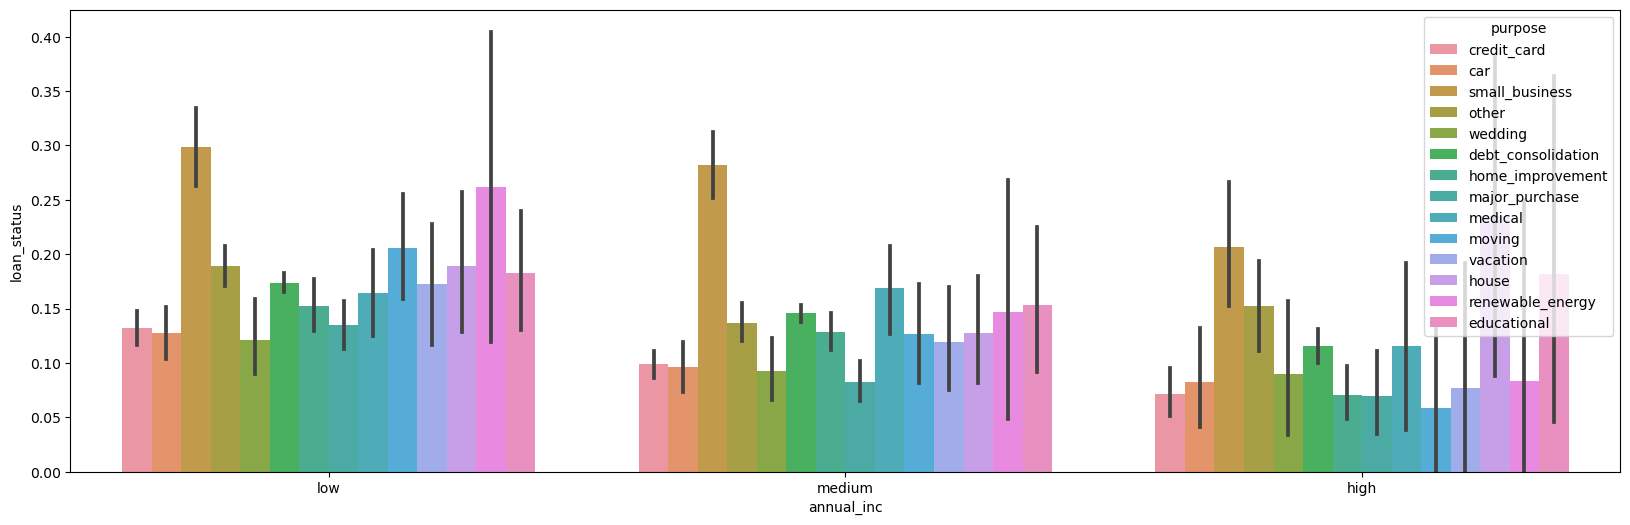

In [87]:
# annual income
plot_segmented('annual_inc')

In [88]:
# variation of default rate across annual_inc
loan_ip.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low       0.169797
medium    0.136782
high      0.107445
Name: loan_status, dtype: float64

# BIVARIATE ANALYSIS of Continous Variables

In [89]:
#How the funded_amnt_inv is distributed based on default rate?

#creating a function for plotting

def plot_dist(cat_var):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cat_var, y='loan_status', data=loan_ip)
    plt.show()

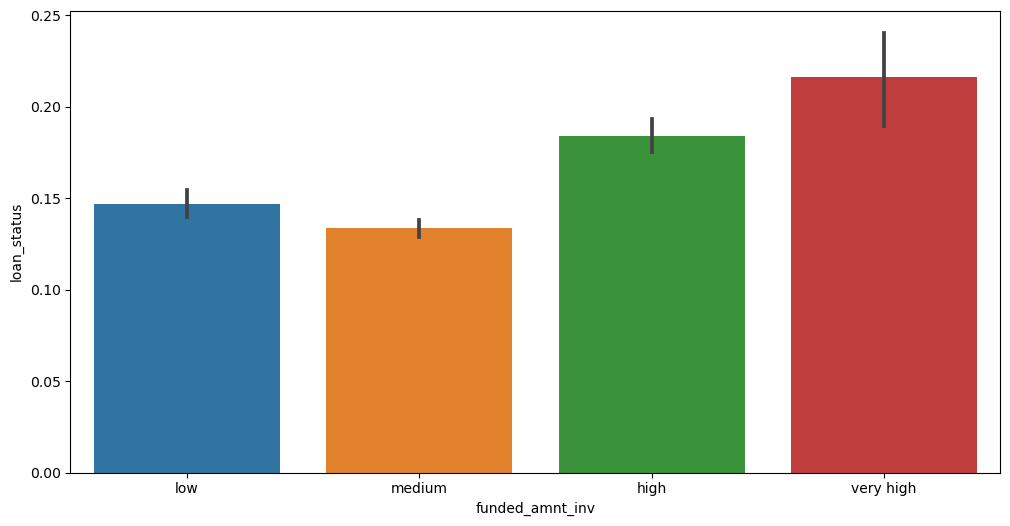

In [90]:
plot_dist('funded_amnt_inv')

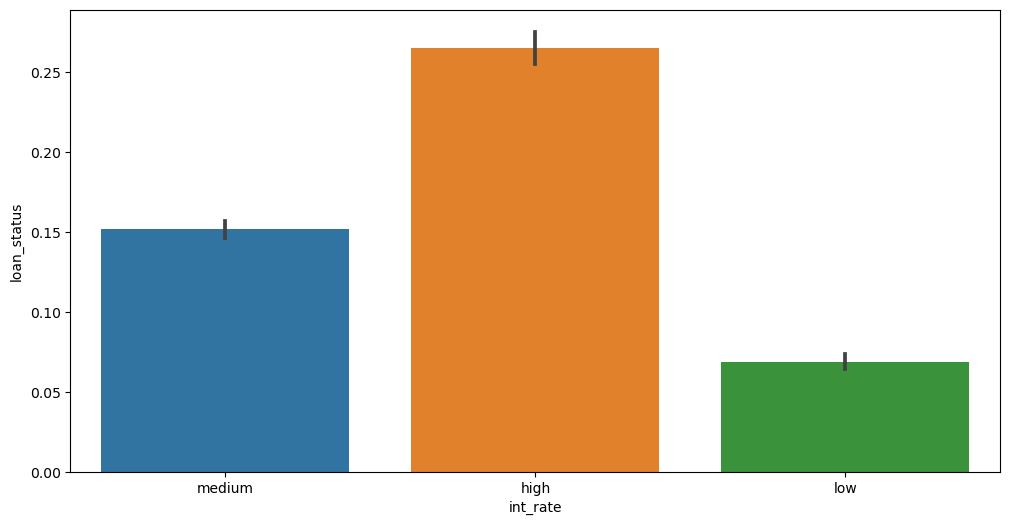

In [91]:
plot_dist('int_rate')


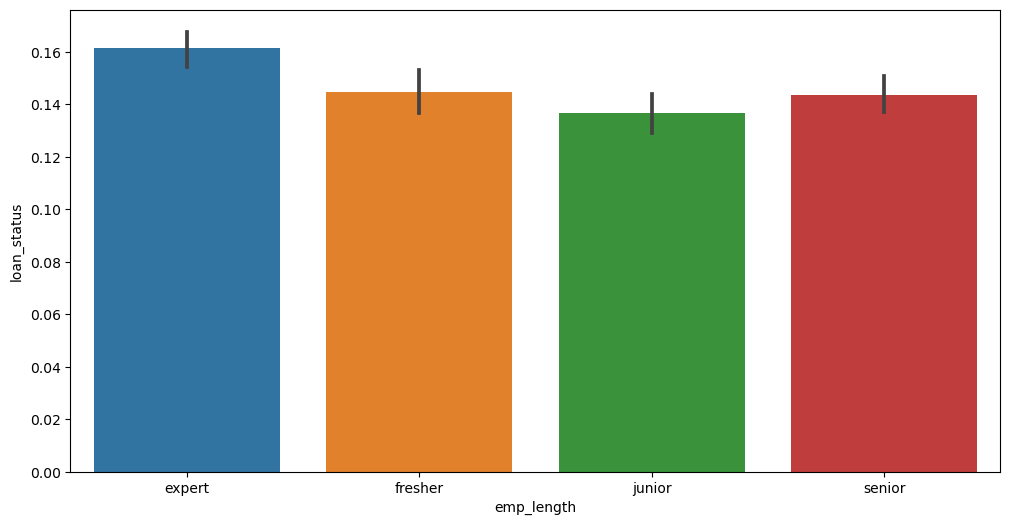

In [92]:
plot_dist('emp_length')

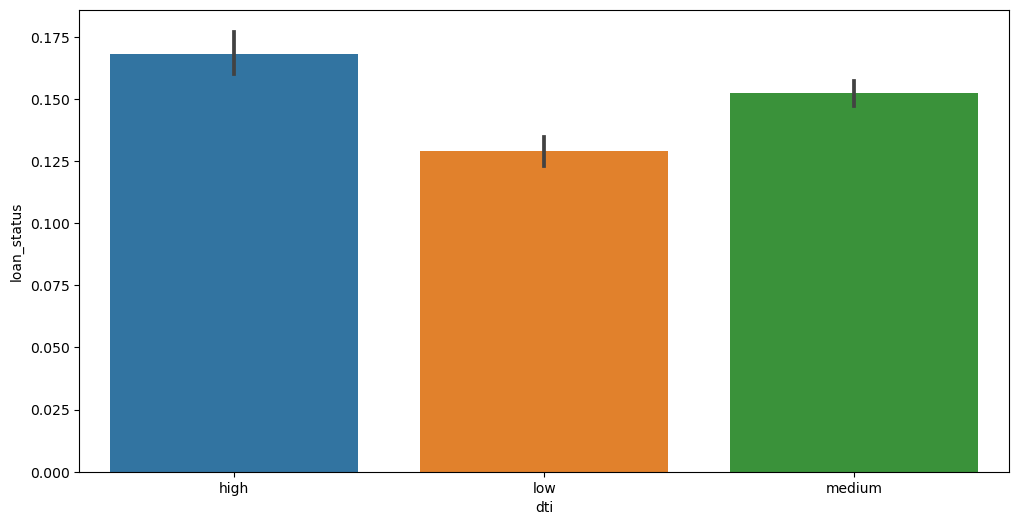

In [93]:
plot_dist('dti')

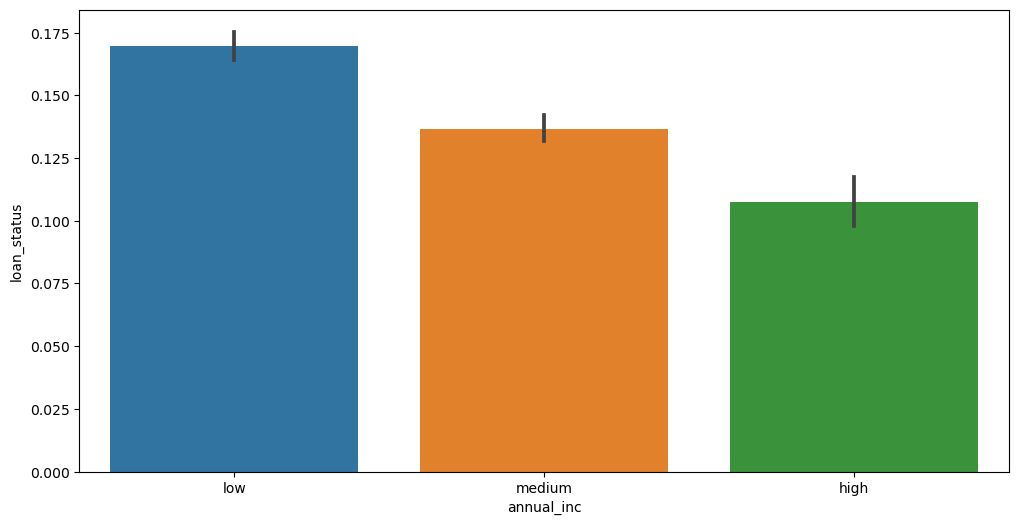

In [94]:
plot_dist('annual_inc')

In [95]:
loan_ip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36642 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               36642 non-null  int64         
 1   funded_amnt             36642 non-null  int64         
 2   funded_amnt_inv         36642 non-null  object        
 3   term                    36642 non-null  int64         
 4   int_rate                36642 non-null  object        
 5   installment             36642 non-null  float64       
 6   grade                   36642 non-null  object        
 7   sub_grade               36642 non-null  object        
 8   emp_title               34439 non-null  object        
 9   emp_length              36642 non-null  object        
 10  home_ownership          36642 non-null  object        
 11  annual_inc              36642 non-null  object        
 12  verification_status     36642 non-null  object

In [96]:
loan_ip.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'dti',
       'mths_since_last_delinq', 'pub_rec_bankruptcies', 'month', 'year'],
      dtype='object')

In [97]:
#creating a function to analyse default rate  against int_rate and other variables 

def plot_segmented(cat_var):
    plt.figure(figsize=(20, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='int_rate', data=loan_ip)
    plt.show()

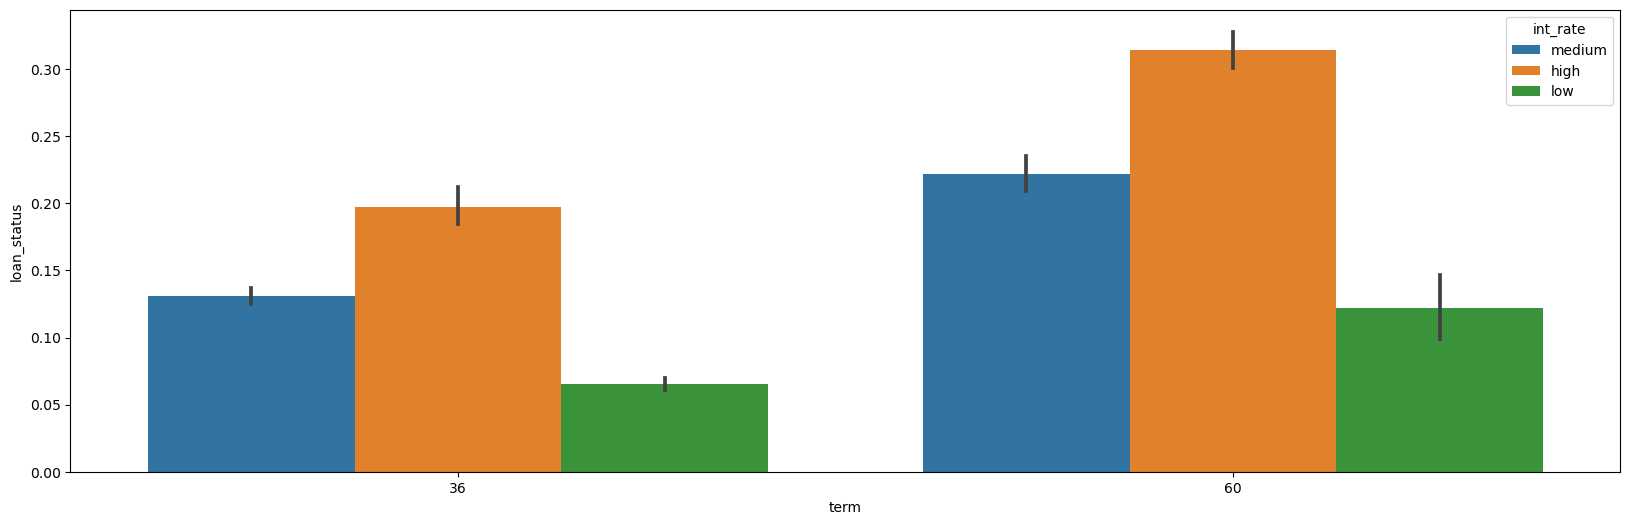

In [98]:
#vs term analysis

plot_segmented('term')

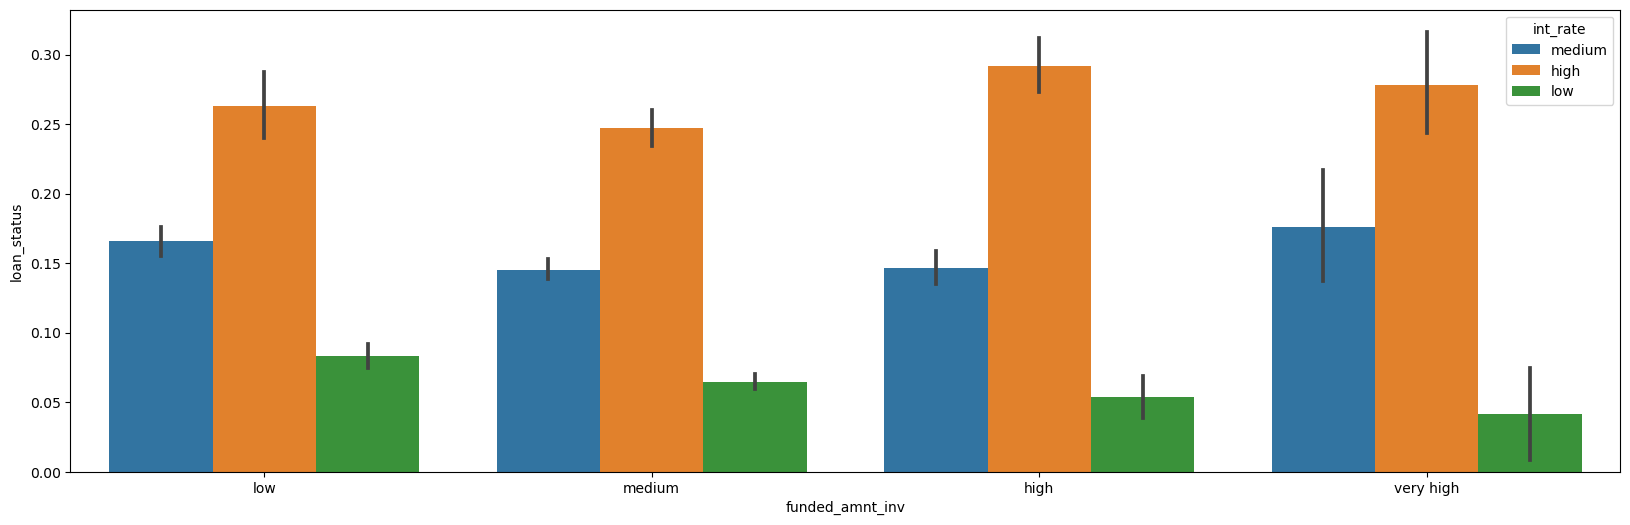

In [99]:
#vs term analysis
plot_segmented('funded_amnt_inv')

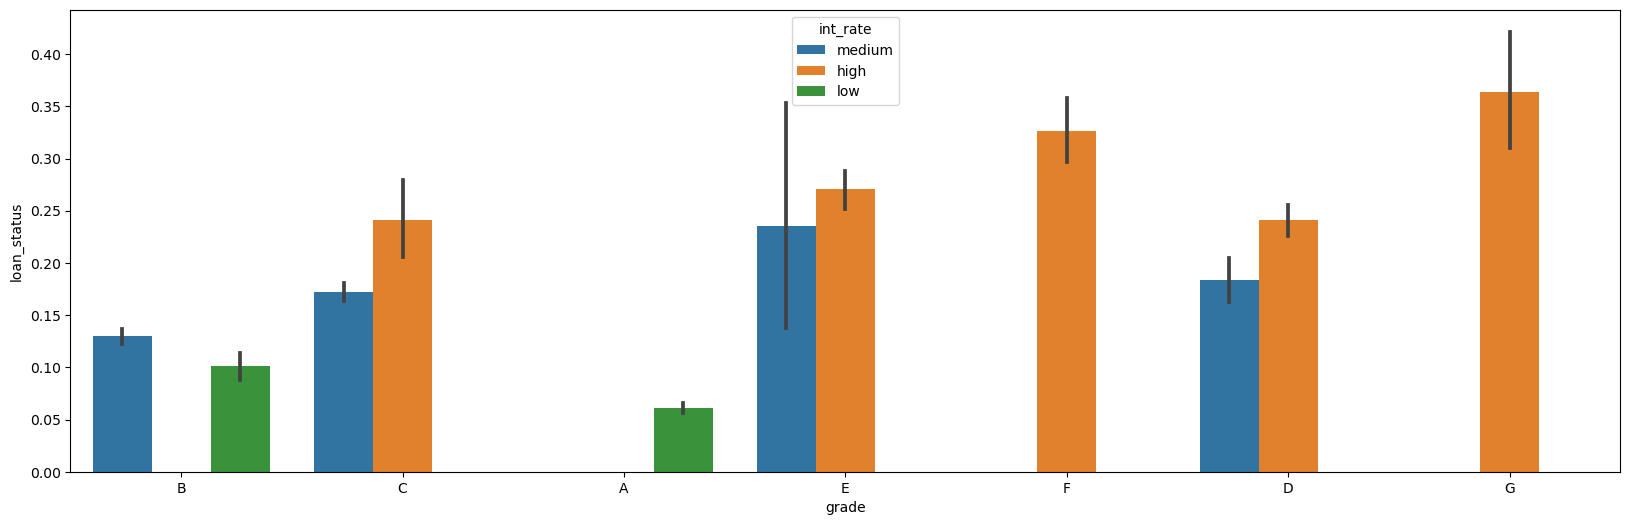

In [100]:
#vs grade analysis
plot_segmented('grade')

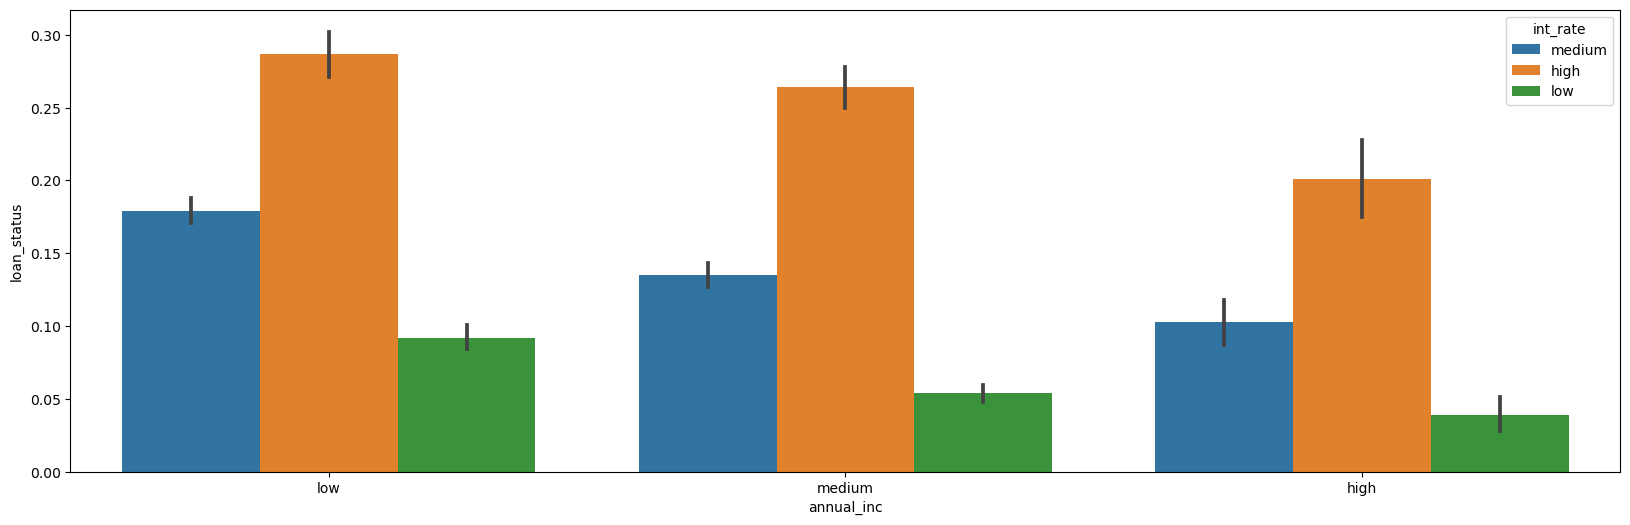

In [101]:
#vs grade analysis
plot_segmented('annual_inc')

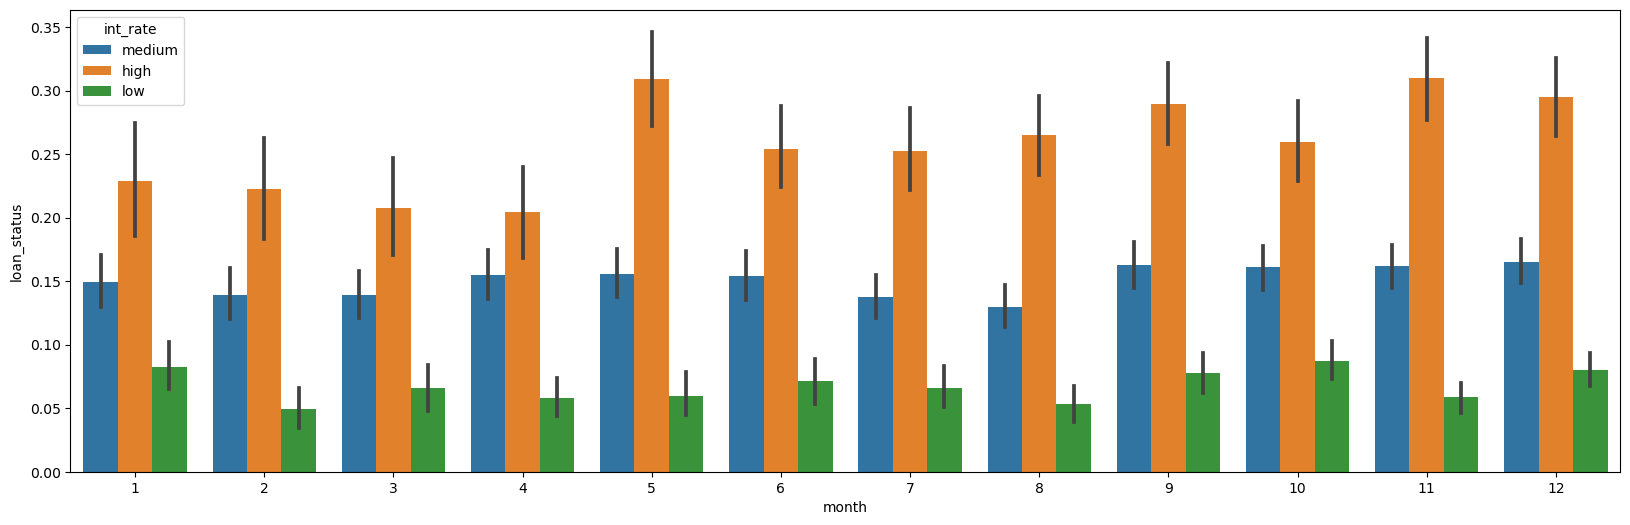

In [102]:
#vs grade analysis
plot_segmented('month')

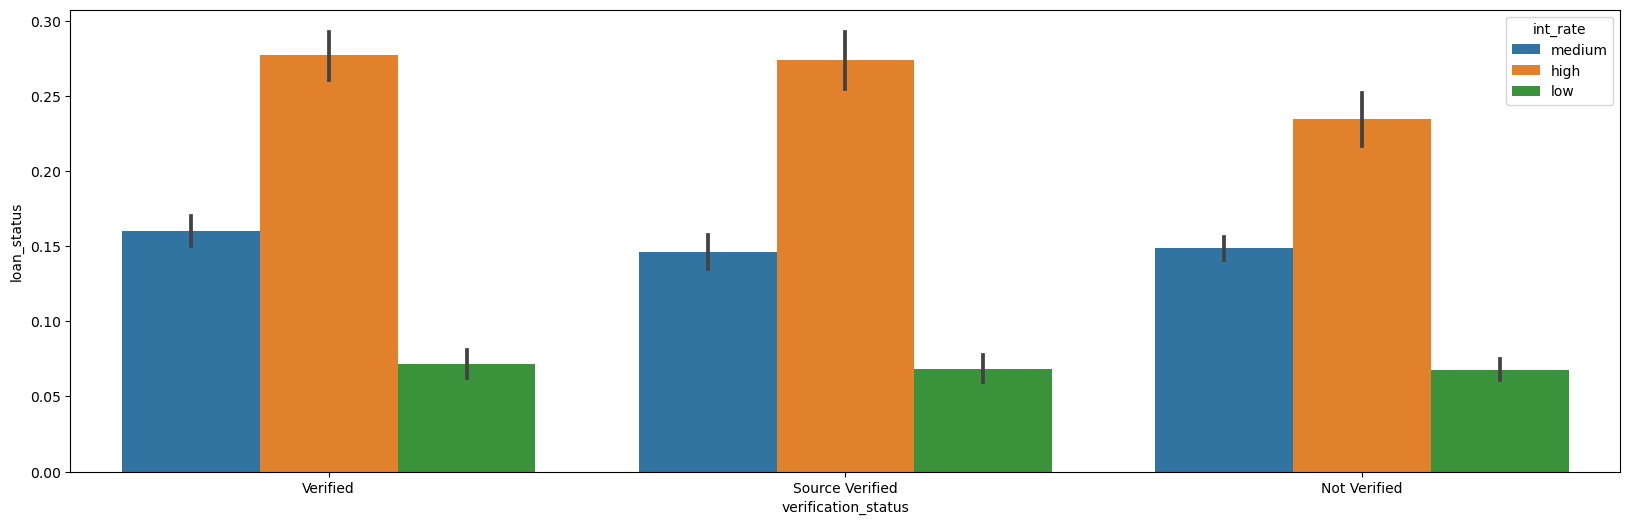

In [103]:
#vs grade analysis
plot_segmented('verification_status')

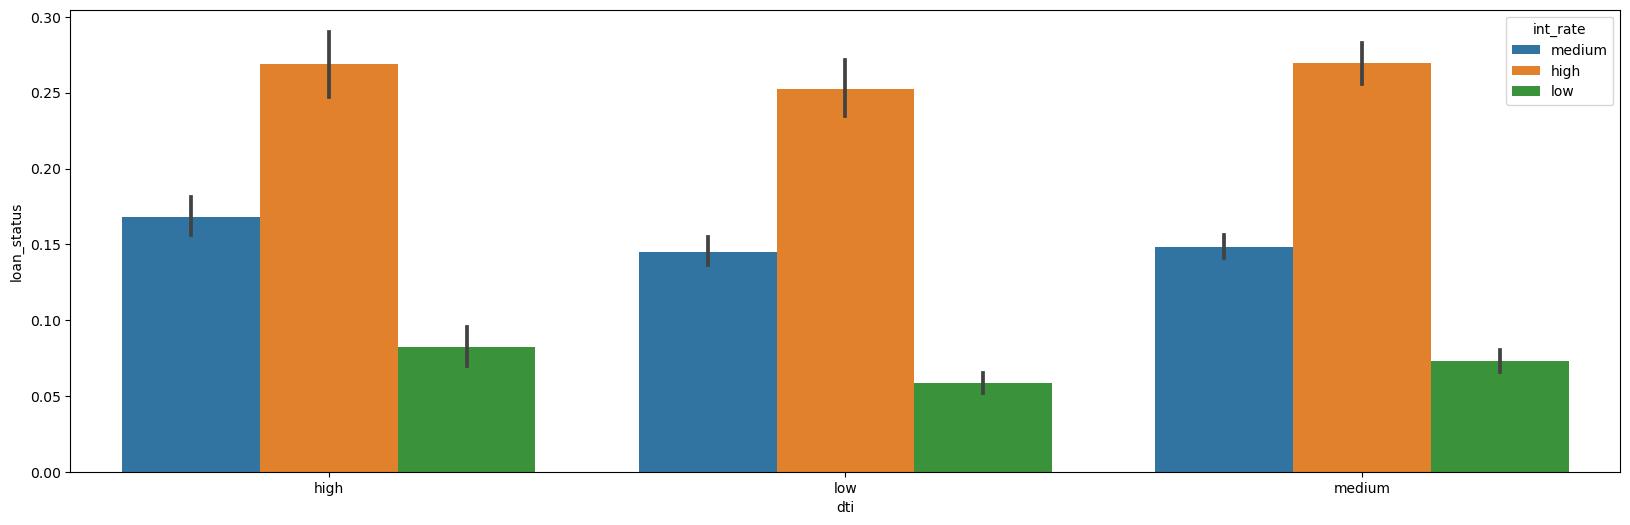

In [104]:
#vs grade analysis
plot_segmented('dti')